Evaluating a car using 6 variables. Data Analysis, Data visualization, Feature Selection and Reduction, K-Nearest Neighbor(KNN) estimator/model. Multilayer Perceptron(Deep Learning/Artificial Neural Network). Dataset splitted into training and testing data in order to avoid overfitting.

In [1]:
import numpy
import pandas
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import to_categorical


from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm



# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load dataset
dataframe = pandas.read_csv(r"../input/car_evaluation.csv")

# Assign names to Columns
dataframe.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

# Encode Data
dataframe.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
dataframe.persons.replace(('2','4','more'),(1,2,3), inplace=True)
dataframe.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
dataframe.safety.replace(('low','med','high'),(1,2,3), inplace=True)
dataframe.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [3]:
print("dataframe.head: ", dataframe.head())

dataframe.head:     buying  maint  doors  persons  lug_boot  safety  classes
0       1      1      1        1         1       2        1
1       1      1      1        1         1       3        1
2       1      1      1        1         2       1        1
3       1      1      1        1         2       2        1
4       1      1      1        1         2       3        1


In [4]:
print("dataframe.describe: ", dataframe.describe())

dataframe.describe:              buying        maint        doors      persons     lug_boot  \
count  1727.000000  1727.000000  1727.000000  1727.000000  1727.000000   
mean      2.500869     2.500869     2.500869     2.000579     2.000579   
std       1.118098     1.118098     1.118098     0.816615     0.816615   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     1.000000     1.000000   
50%       3.000000     3.000000     3.000000     2.000000     2.000000   
75%       3.500000     3.500000     3.500000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety      classes  
count  1727.000000  1727.000000  
mean      2.000579     1.415171  
std       0.816615     0.740847  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     1.000000  
75%       3.000000     2.000000  
max       3.000000     4.000000  


(array([ 1209.,     0.,     0.,   384.,     0.,     0.,    69.,     0.,
            0.,    65.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

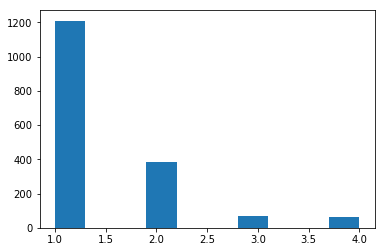

In [5]:
plt.hist((dataframe.classes))


Samples distributed among 'Classes' have a positive skew, with majority being in the 'unacc'(unacceptable),'acc'(acceptable) output class

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd81581beb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd815495240>]], dtype=object)

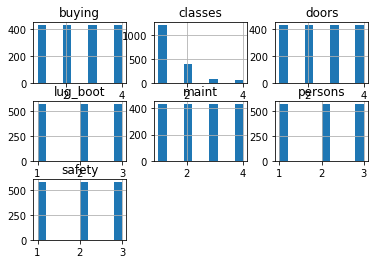

In [6]:
dataframe.hist()

Every input feature seems evenly distributed, implying their multivariate interelation is what causes the skew in the 'classes' 

In [7]:
dataset = dataframe.values


X = dataset[:,0:6]
Y = numpy.asarray(dataset[:,6], dtype="S6")


# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)


# create model
knn = KNeighborsClassifier()

knn.fit(X_Train, Y_Train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

predictions = knn.predict(X_Test)

score = accuracy_score(Y_Test, predictions)
print(score)


0.942196531792


KNN score: 94%

In [8]:
# create model
model = Sequential()
model.add(Dense(25, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=600, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, input_dim=6, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  import sys


Epoch 1/600
1381/1381 [==============================] - 0s - loss: 1.2624 - acc: 0.3541     
Epoch 2/600
1381/1381 [==============================] - 0s - loss: 0.4675 - acc: 0.6307     
Epoch 3/600
1381/1381 [==============================] - 0s - loss: 0.4315 - acc: 0.6539     
Epoch 4/600
1381/1381 [==============================] - 0s - loss: 0.4230 - acc: 0.6575     
Epoch 5/600
1381/1381 [==============================] - 0s - loss: 0.4144 - acc: 0.6560     
Epoch 6/600
1381/1381 [==============================] - 0s - loss: 0.4079 - acc: 0.6879     
Epoch 7/600
1381/1381 [==============================] - 0s - loss: 0.3941 - acc: 0.6684     
Epoch 8/600
1381/1381 [==============================] - 0s - loss: 0.3965 - acc: 0.6836     
Epoch 9/600
1381/1381 [==============================] - 0s - loss: 0.3879 - acc: 0.6821     
Epoch 10/600
1381/1381 [==============================] - 0s - loss: 0.3810 - acc: 0.6879     
Epoch 11/600
1381/1381 [==============================] - 0

MLP(ANN) score: 93.64%